# Film segmentation

In [2]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray

img_path = "/media/luis/TOMO/Dosepy/BQT_INCAN/Tiff/fondo001.tif"
img = iio.imread(img_path)

from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import colors

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

In [3]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1, vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

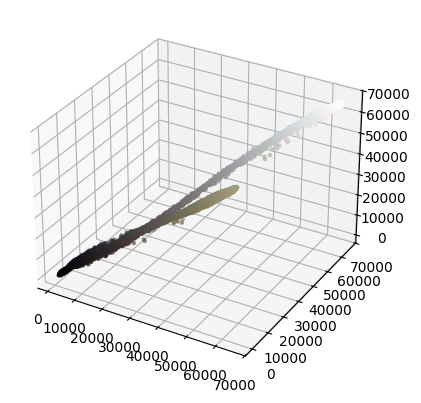

In [4]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter3D(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
plt.show()

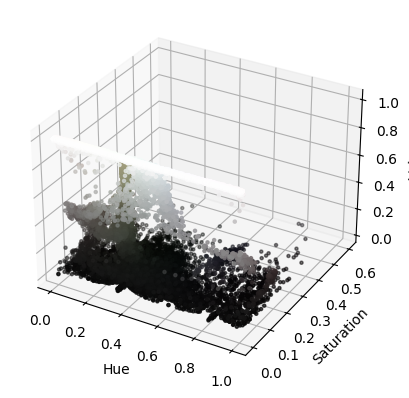

In [5]:
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(img)

h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Segmentation based on HSV 

In [6]:
import numpy.ma as ma

mask_h = ma.masked_less(h, 0.32)
mask_s = ma.masked_less(s, 0.35)
mask_v = ma.masked_less(v, 0.75)

film = 0*np.zeros(img.shape)

film[:,:,0]=mask_h.mask
film[:,:,1]=mask_s.mask
film[:,:,2]=mask_v.mask

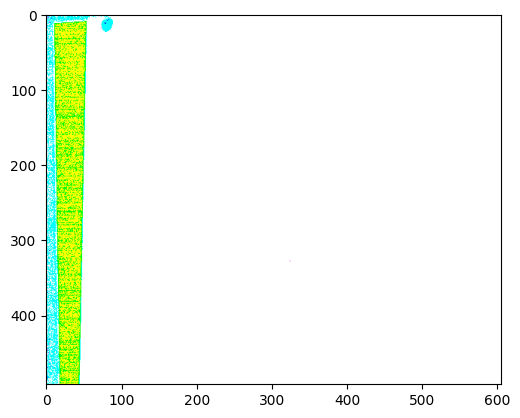

In [7]:
plt.imshow(film)

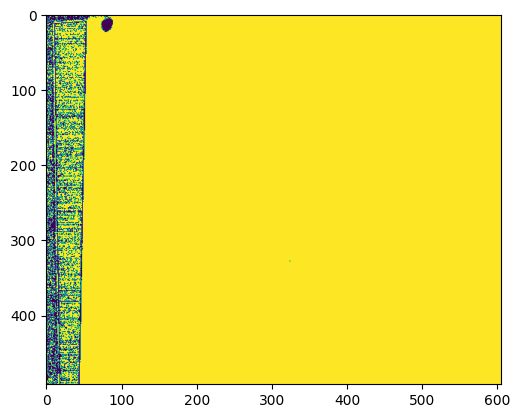

In [8]:
mask_binary = np.logical_and(film[:,:,0], film[:,:,1], film[:,:,2])
plt.imshow(mask_binary)

In [9]:
mask_binary

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

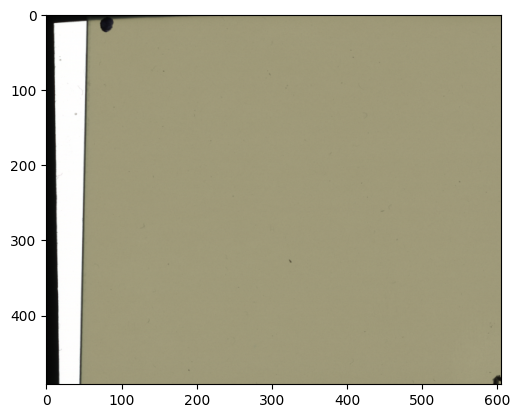

In [10]:
plt.imshow(img/np.max(img))

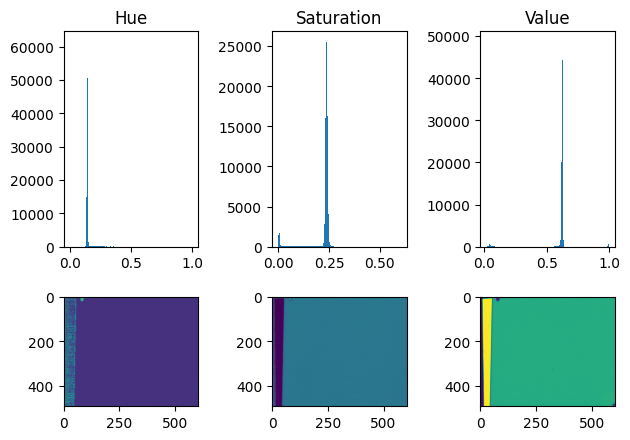

In [11]:
fig = plt.figure(tight_layout=True)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(h.ravel(), 512)
ax1.set_title("Hue")
ax2.hist(s.ravel(), 512)
ax2.set_title("Saturation")
ax3.hist(v.ravel(), 512)
ax3.set_title("Value")
ax4.imshow(h)
ax5.imshow(s)
ax6.imshow(v)

In [12]:
hue_after_thresh = np.logical_and(h > 0.05, h < 0.29)
sat_after_thresh = s > 0.1
val_after_thresh = np.logical_and(v > 0.40, v < 0.9)
binary_img = np.logical_and(hue_after_thresh, sat_after_thresh, val_after_thresh)

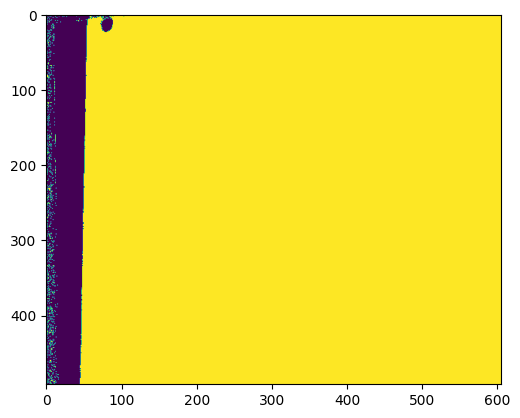

In [13]:
plt.imshow(binary_img)

In [31]:
import skimage
from skimage.morphology import square
from skimage.measure import label
from numpy import ndarray
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
import numpy as np

In [15]:

bi_img_filtered = skimage.morphology.binary_erosion(binary_img, mode="min", footprint=square(5))

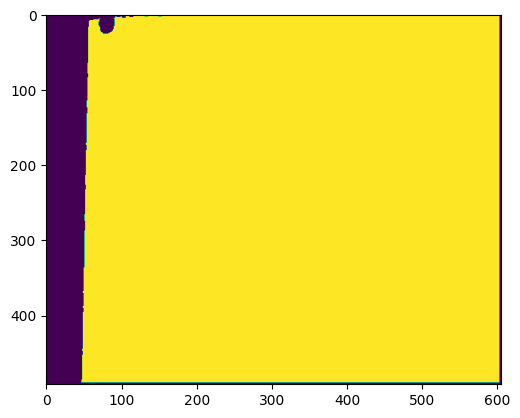

In [16]:
plt.imshow(bi_img_filtered)

In [ ]:
def get_labeled_films(img: ndarray, show: bool = False, return_num: bool = False):
    # Convert to HSV
    hsv_img = rgb2hsv(img)
    h = hsv_img[:, :, 0]
    s = hsv_img[:, :, 1]
    v = hsv_img[:, :, 2]

    # Get binary with thresholding
    # If v is LOW, it is a DARK region
    # If v is HIGH, it is a BRIGHT region
    binary_img = np.logical_and(v > 0.1, v < 0.9)

    # Filter for small bright spots
    bi_img_filtered = skimage.morphology.binary_erosion(binary_img, mode="min", footprint=square(3))

    # Get labeled regions
    labeled_img, num_labels = label(bi_img_filtered, return_num=True)

    # Remove small regions
    


    # Plot if show is True
    if show:
        fig = plt.figure(tight_layout=True)
        ax1 = fig.add_subplot(231)
        ax2 = fig.add_subplot(232)
        ax3 = fig.add_subplot(233)
        ax4 = fig.add_subplot(234)
        ax5 = fig.add_subplot(235)
        ax6 = fig.add_subplot(236)

        ax1.hist(h.ravel(), 512)
        ax1.set_title("Hue")
        ax2.hist(s.ravel(), 512)
        ax2.set_title("Saturation")
        ax3.hist(v.ravel(), 512)
        ax3.set_title("Value")
        ax4.imshow(h)
        ax5.imshow(s)
        ax6.imshow(v)

    return label(bi_img_filtered, return_num=return_num)

# Testing the get_labeled_function

9


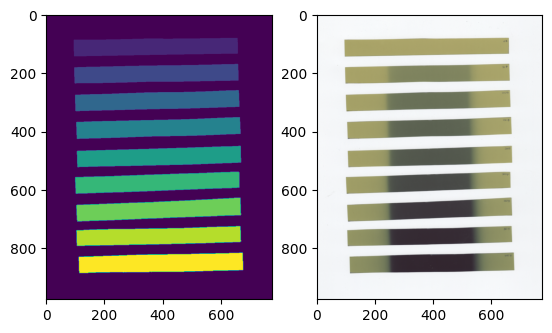

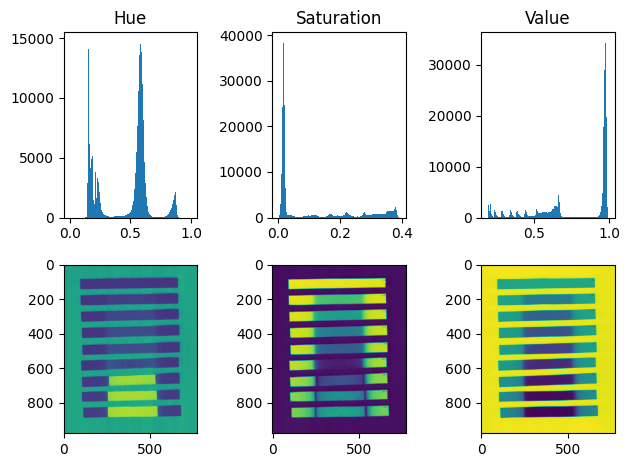

In [35]:
cal_file_path = "/home/luis/Documents/GitHub/Dosepy/docs/Jupyter/cal_48h.tif"
img = iio.imread(cal_file_path)

fig = plt.figure()
axes = fig.subplots(1, 2)

labels, num = get_labeled_films(img, show=True, return_num=True)
print(f"{num}")
axes[0].imshow(labels)
axes[1].imshow(img/np.max(img))

311


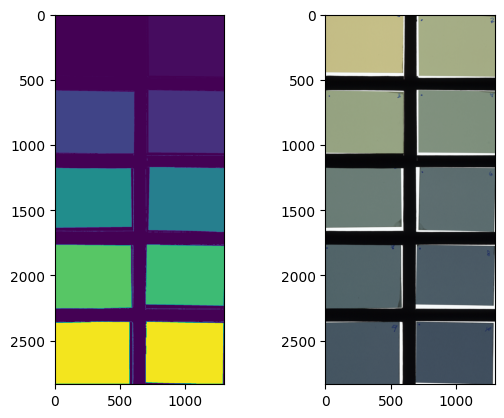

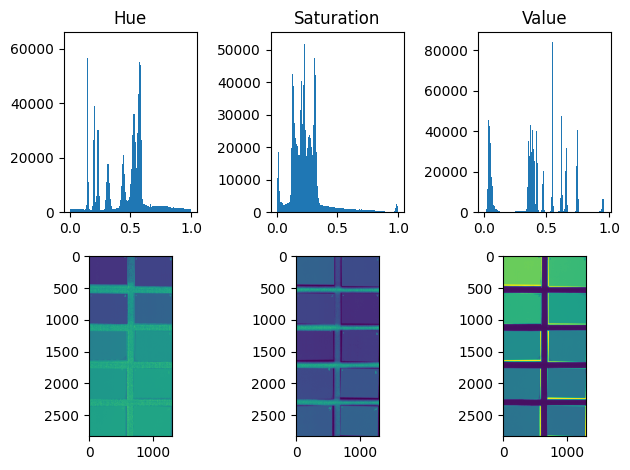

In [36]:
cal_file_path = "/home/luis/Documents/GitHub/Dosepy/docs/Jupyter/Calibracion_Post.tif"
img = iio.imread(cal_file_path)

fig = plt.figure()
axes = fig.subplots(1, 2)

labels, num = get_labeled_films(img, show=True, return_num=True)
print(f"{num}")
axes[0].imshow(labels)
axes[1].imshow(img/np.max(img))

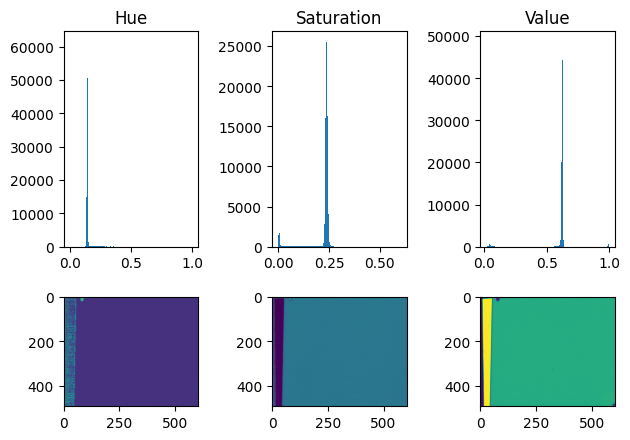

In [19]:
fig = plt.figure(tight_layout=True)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(h.ravel(), 512)
ax1.set_title("Hue")
ax2.hist(s.ravel(), 512)
ax2.set_title("Saturation")
ax3.hist(v.ravel(), 512)
ax3.set_title("Value")
ax4.imshow(h)
ax5.imshow(s)
ax6.imshow(v)